In [2]:
import pandas as pd

0.000000 0.000000 1.900000
          predict 1  predict 2
actual 1          3          0
actual 2          3          0
0.333333 0.000000 0.900000
          predict 1  predict 2
actual 1          2          1
actual 2          3          0
0.333333 0.666667 0.600000
          predict 1  predict 2
actual 1          2          1
actual 2          1          2
0.666667 0.666667 0.500000
          predict 1  predict 2
actual 1          1          2
actual 2          1          2
0.666667 1.000000 0.400000
          predict 1  predict 2
actual 1          1          2
actual 2          0          3
1.000000 1.000000 0.300000
          predict 1  predict 2
actual 1          0          3
actual 2          0          3
0.5555555555555556


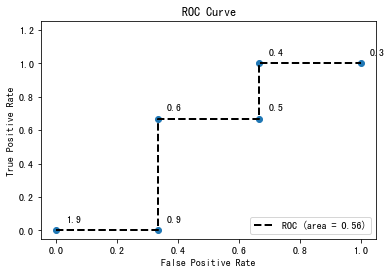

In [1]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
y_label = ([1, 1, 1, 2, 2, 2])  # 非二进制需要pos_label
y_pre = ([0.3, 0.5, 0.9, 0.8, 0.4, 0.6])
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=2)
a = []
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))
    l = []
    for x in y_pre:
        if x < value:
            l.append(1)
        else:
            l.append(2)
    p = pd.DataFrame(confusion_matrix(y_label,l),index = ["actual 1","actual 2"],columns=["predict 1","predict 2"])
    print(p)
    a.append(confusion_matrix(y_label,l))
print("===============================================")
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.scatter(fpr,tpr)
for x,y,z in zip(fpr,tpr,thersholds):
    plt.text(x+0.03,y+0.05,s=z)
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.25])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curve')
plt.legend(loc="lower right")


1.9
0.9
0.6
0.5
0.4
0.3


Text(0.5, 0, 'cut off (臨界值)')

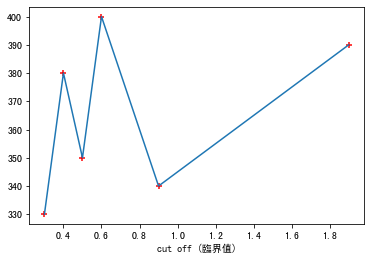

In [2]:
profit_matrix = np.array([[100,50],[30,60]])
su = []
for x,y in zip(thersholds,a):
    print(x)
    su.append(np.sum(y*profit_matrix))
plt.plot(thersholds,su)
plt.scatter(thersholds,su,color="r",marker="+")
plt.xlabel("cut off (臨界值)")

In [3]:
import pandas as pd
s = pd.DataFrame([y_label,y_pre]).T
s

,0,1
0,1.0,0.3
1,1.0,0.5
2,1.0,0.9
3,2.0,0.8
4,2.0,0.4
5,2.0,0.6


In [4]:
import seaborn as sns

In [5]:
s = pd.DataFrame(s.groupby(0)[1].value_counts())
s

1
0   1     
1.0 0.3  1
    0.5  1
    0.9  1
2.0 0.4  1
    0.6  1
    0.8  1

In [6]:
l = np.array(list(s.index))
l

array([[1. , 0.3],
       [1. , 0.5],
       [1. , 0.9],
       [2. , 0.4],
       [2. , 0.6],
       [2. , 0.8]])

In [7]:
s[2] = l[:,0]
s

1    2
0   1          
1.0 0.3  1  1.0
    0.5  1  1.0
    0.9  1  1.0
2.0 0.4  1  2.0
    0.6  1  2.0
    0.8  1  2.0

<BarContainer object of 6 artists>

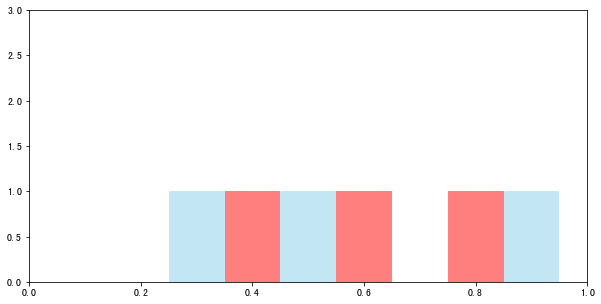

In [8]:
plt.figure(figsize=(10,5))
plt.xlim(0,1)
plt.ylim(0,3)
plt.bar(l[:,1],s[1],color=["skyblue","skyblue","skyblue","r","r","r"],alpha=0.5,width=0.1)

In [9]:
s[2]

0    1  
1.0  0.3    1.0
     0.5    1.0
     0.9    1.0
2.0  0.4    2.0
     0.6    2.0
     0.8    2.0
Name: 2, dtype: float64

# practice diabetes

In [3]:
diabetes = pd.read_csv(r"https://gist.githubusercontent.com/chaityacshah/899a95deaf8b1930003ae93944fd17d7/raw/3d35de839da708595a444187e9f13237b51a2cbe/pima-indians-diabetes.csv")
diabetes

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes = diabetes.iloc[:,[0,1,3,5,8]]
diabetes

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,4. Triceps skin fold thickness (mm),6. Body mass index (weight in kg/(height in m)^2),9. Class variable (0 or 1)
0,6,148,35,33.6,1
1,1,85,29,26.6,0
2,8,183,0,23.3,1
3,1,89,23,28.1,0
4,0,137,35,43.1,1
...,...,...,...,...,...
763,10,101,48,32.9,0
764,2,122,27,36.8,0
765,5,121,23,26.2,0
766,1,126,0,30.1,1


In [5]:
x = diabetes.iloc[:,0:4]

In [6]:
y = diabetes.iloc[:,-1]

In [14]:
# sklearn 及 statsmodel的差別在於有沒有fit_intercept , statsmodel沒有intercept
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty="l2",fit_intercept=True)
logistic.fit(x.values,y.values)
#每項預測為一的機率
proba = logistic.predict_proba(x.values)[:,1]
pro = []
for x in proba:
    pro.append(round(x,2))
proba = np.array(pro)
proba

array([0.61, 0.05, 0.76, 0.06, 0.51, 0.21, 0.07, 0.54, 0.78, 0.06, 0.34,
       0.9 , 0.57, 0.71, 0.58, 0.23, 0.4 , 0.26, 0.28, 0.22, 0.43, 0.34,
       0.95, 0.37, 0.77, 0.5 , 0.76, 0.06, 0.59, 0.36, 0.31, 0.55, 0.06,
       0.08, 0.4 , 0.1 , 0.71, 0.31, 0.15, 0.3 , 0.77, 0.68, 0.15, 0.94,
       0.64, 0.8 , 0.38, 0.04, 0.38, 0.03, 0.05, 0.07, 0.08, 0.84, 0.67,
       0.03, 0.9 , 0.27, 0.57, 0.23, 0.01, 0.57, 0.02, 0.26, 0.38, 0.15,
       0.14, 0.37, 0.04, 0.43, 0.15, 0.39, 0.83, 0.43, 0.06, 0.  , 0.09,
       0.24, 0.5 , 0.12, 0.12, 0.  , 0.12, 0.06, 0.8 , 0.18, 0.53, 0.22,
       0.83, 0.1 , 0.03, 0.32, 0.35, 0.27, 0.27, 0.59, 0.1 , 0.02, 0.14,
       0.54, 0.71, 0.35, 0.12, 0.04, 0.17, 0.2 , 0.06, 0.43, 0.11, 0.14,
       0.69, 0.73, 0.08, 0.11, 0.67, 0.51, 0.42, 0.13, 0.12, 0.09, 0.84,
       0.31, 0.18, 0.34, 0.19, 0.38, 0.47, 0.21, 0.24, 0.1 , 0.68, 0.52,
       0.7 , 0.26, 0.05, 0.31, 0.1 , 0.07, 0.25, 0.3 , 0.17, 0.35, 0.18,
       0.42, 0.58, 0.01, 0.09, 0.14, 0.6 , 0.07, 0.

In [15]:
print(logistic.intercept_)

[-8.15293665]


In [16]:
#用statsmodel 算
import statsmodels.api as sm
c = sm.Logit(y.values,diabetes.iloc[:,0:4])
c = c.fit()
c.summary()
c.predict(diabetes.iloc[:,0:4])

Optimization terminated successfully.
         Current function value: 0.654891
         Iterations 4


0      0.448769
1      0.363365
2      0.629764
3      0.353550
4      0.267120
         ...   
763    0.445529
764    0.327162
765    0.472153
766    0.381676
767    0.337605
Length: 768, dtype: float64

In [17]:
dataframe = pd.DataFrame([proba,y.values]).T
dataframe

,0,1
0,0.61,1.0
1,0.05,0.0
2,0.76,1.0
3,0.06,0.0
4,0.51,1.0
...,...,...
763,0.32,0.0
764,0.33,0.0
765,0.23,0.0
766,0.24,1.0


In [18]:
dataframe

,0,1
0,0.61,1.0
1,0.05,0.0
2,0.76,1.0
3,0.06,0.0
4,0.51,1.0
...,...,...
763,0.32,0.0
764,0.33,0.0
765,0.23,0.0
766,0.24,1.0


In [19]:
dataframe = pd.DataFrame(dataframe.groupby([1])[0].value_counts())
dataframe

0
1   0       
0.0 0.06  24
    0.08  21
    0.12  21
    0.10  20
    0.07  17
...       ..
1.0 0.66   1
    0.68   1
    0.70   1
    0.85   1
    0.97   1

[173 rows x 1 columns]

In [20]:
dataframe.columns = ["number"]

In [21]:
dataframe

number
1   0           
0.0 0.06      24
    0.08      21
    0.12      21
    0.10      20
    0.07      17
...          ...
1.0 0.66       1
    0.68       1
    0.70       1
    0.85       1
    0.97       1

[173 rows x 1 columns]

In [22]:
dataframe["classify"] = np.array(list(dataframe.index))[:,0]
dataframe
dataframe["opportunity"] = np.array(list(dataframe.index))[:,1]
dataframe

number  classify  opportunity
1   0                                  
0.0 0.06      24       0.0         0.06
    0.08      21       0.0         0.08
    0.12      21       0.0         0.12
    0.10      20       0.0         0.10
    0.07      17       0.0         0.07
...          ...       ...          ...
1.0 0.66       1       1.0         0.66
    0.68       1       1.0         0.68
    0.70       1       1.0         0.70
    0.85       1       1.0         0.85
    0.97       1       1.0         0.97

[173 rows x 3 columns]

In [23]:
color = []
for x in dataframe["classify"].values:
    if x == 0.0:
        color.append("g")
    else:
        color.append("pink")
dataframe["color"] = color

In [24]:
dataframe

number  classify  opportunity color
1   0                                        
0.0 0.06      24       0.0         0.06     g
    0.08      21       0.0         0.08     g
    0.12      21       0.0         0.12     g
    0.10      20       0.0         0.10     g
    0.07      17       0.0         0.07     g
...          ...       ...          ...   ...
1.0 0.66       1       1.0         0.66  pink
    0.68       1       1.0         0.68  pink
    0.70       1       1.0         0.70  pink
    0.85       1       1.0         0.85  pink
    0.97       1       1.0         0.97  pink

[173 rows x 4 columns]

<BarContainer object of 173 artists>

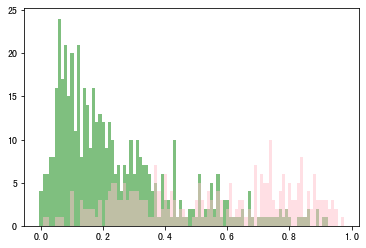

In [25]:
plt.bar(dataframe["opportunity"],dataframe["number"].values,color=dataframe["color"],width=0.01,alpha = 0.5)

In [26]:
y_label = diabetes.iloc[:,-1].values # 非二进制需要pos_label
y_pre = proba
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=1)

In [27]:
matrix = []
for x,y,z in zip(fpr,tpr,thersholds):
    l = []
    for m in proba:
        if m < z:
            l.append(0)
        else:
            l.append(1)
    matrix.append(confusion_matrix(diabetes.iloc[:,-1].values,l))
    p = pd.DataFrame(confusion_matrix(diabetes.iloc[:,-1].values,l),index = ["actual 0","actual 1"],columns=["predict 0","predict 1"])
    print("thersholds:",z)
    print(p)
roc_auc = auc(fpr, tpr)
print("auc",roc_auc)

thersholds: 1.97
          predict 0  predict 1
actual 0        500          0
actual 1        268          0
thersholds: 0.97
          predict 0  predict 1
actual 0        500          0
actual 1        267          1
thersholds: 0.95
          predict 0  predict 1
actual 0        500          0
actual 1        265          3
thersholds: 0.94
          predict 0  predict 1
actual 0        500          0
actual 1        262          6
thersholds: 0.93
          predict 0  predict 1
actual 0        500          0
actual 1        260          8
thersholds: 0.91
          predict 0  predict 1
actual 0        498          2
actual 1        254         14
thersholds: 0.9
          predict 0  predict 1
actual 0        498          2
actual 1        251         17
thersholds: 0.89
          predict 0  predict 1
actual 0        496          4
actual 1        248         20
thersholds: 0.88
          predict 0  predict 1
actual 0        496          4
actual 1        242         26
thersholds:

thersholds: 0.11
          predict 0  predict 1
actual 0        145        355
actual 1          9        259
thersholds: 0.1
          predict 0  predict 1
actual 0        125        375
actual 1          5        263
thersholds: 0.09
          predict 0  predict 1
actual 0        110        390
actual 1          5        263
thersholds: 0.08
          predict 0  predict 1
actual 0         89        411
actual 1          5        263
thersholds: 0.07
          predict 0  predict 1
actual 0         72        428
actual 1          4        264
thersholds: 0.06
          predict 0  predict 1
actual 0         48        452
actual 1          3        265
thersholds: 0.05
          predict 0  predict 1
actual 0         32        468
actual 1          2        266
thersholds: 0.03
          predict 0  predict 1
actual 0         16        484
actual 1          2        266
thersholds: 0.01
          predict 0  predict 1
actual 0          4        496
actual 1          0        268
thersholds:

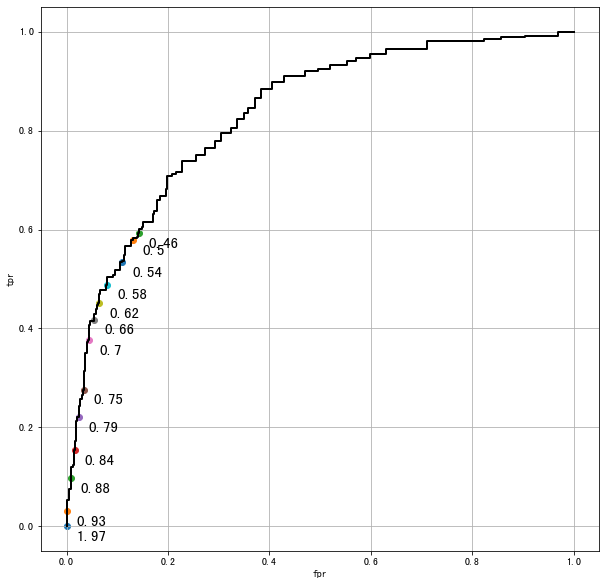

In [28]:
plt.figure(figsize=(10,10))
plt.grid(which = 'both')
plt.step(fpr,tpr, 'k', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.xlabel("fpr")
plt.ylabel("tpr")
for x in range(0,52,4):
    plt.scatter(fpr[x],tpr[x])
    plt.text(fpr[x]+0.02,tpr[x]-0.03,thersholds[x],size=15)

In [29]:
profit_matrix1 = np.array([[0,-5],[-100,-75]])
profit_matrix2 = np.array([[0,-10],[-100,-70]])
profit_matrix3 = np.array([[0,-15],[-100,-65]])
profit_matrix4 = np.array([[0,-20],[-100,-60]])
profit_matrix5 = np.array([[0,-25],[-100,-65]])

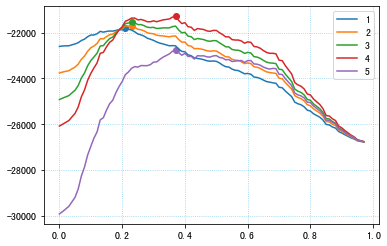

In [30]:
earn = []
plt.grid(color="skyblue",linestyle=":",animated=True)
for y in [profit_matrix1,profit_matrix2,profit_matrix3,profit_matrix4,profit_matrix5]:
    earn1 = []
    for x in matrix:
        earn1.append(np.sum(x * y))
    earn.append(earn1)
earn
for x in range(len(earn)):
    plt.scatter(thersholds[np.where(np.array(earn[x]) == max(earn[x]))[0][0]],max(earn[x]))
    plt.plot(thersholds[1:],earn[x][1:])
plt.legend([1,2,3,4,5])

In [31]:
np.where(np.array(earn[0]) == max(earn[0]))[0][0]

72

In [32]:
logistic.coef_

array([[ 0.13556916,  0.0341544 , -0.00428833,  0.08536756]])

In [33]:
import math
math.exp(0.13556916)

1.1451883943250718

# 用stats model 做

In [34]:
import statsmodels.api as sm
diabetes = pd.read_csv(r"https://gist.githubusercontent.com/chaityacshah/899a95deaf8b1930003ae93944fd17d7/raw/3d35de839da708595a444187e9f13237b51a2cbe/pima-indians-diabetes.csv")
diabetes
diabetes = diabetes.iloc[:,[0,1,3,5,8]]
diabetes
x = diabetes.iloc[:,0:4]
x = sm.add_constant(x) #在模型中加入intercept
y = diabetes.iloc[:,-1]
#用statsmodel 算
c = sm.Logit(y.values,x).fit()
proba = c.predict(x.iloc[:,0:5])
pro = []
for x in proba:
    pro.append(round(x,2))
proba = np.array(pro)
proba
dataframe = pd.DataFrame([proba,y.values]).T
dataframe
dataframe = pd.DataFrame(dataframe.groupby([1])[0].value_counts())
dataframe
dataframe.columns = ["number"]
dataframe["classify"] = np.array(list(dataframe.index))[:,0]
dataframe
dataframe["opportunity"] = np.array(list(dataframe.index))[:,1]
dataframe
color = []
for x in dataframe["classify"].values:
    if x == 0.0:
        color.append("g")
    else:
        color.append("pink")
dataframe["color"] = color

Optimization terminated successfully.
         Current function value: 0.484114
         Iterations 6


In [35]:
print(c.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.2515
Time:                        15:36:56   Log-Likelihood:                -371.80
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 6.895e-53
                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                          -

In [36]:
dataframe

number  classify  opportunity color
1   0                                        
0.0 0.06      24       0.0         0.06     g
    0.08      21       0.0         0.08     g
    0.12      21       0.0         0.12     g
    0.10      20       0.0         0.10     g
    0.07      17       0.0         0.07     g
...          ...       ...          ...   ...
1.0 0.70       1       1.0         0.70  pink
    0.76       1       1.0         0.76  pink
    0.79       1       1.0         0.79  pink
    0.85       1       1.0         0.85  pink
    0.97       1       1.0         0.97  pink

[173 rows x 4 columns]

In [37]:
np.where(dataframe["classify"] == 0)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85])

In [38]:
dataframe["opportunity"].values[np.where(dataframe["classify"] == 0)]

array([0.06, 0.08, 0.12, 0.1 , 0.07, 0.05, 0.14, 0.17, 0.09, 0.15, 0.19,
       0.18, 0.2 , 0.22, 0.11, 0.23, 0.29, 0.31, 0.43, 0.16, 0.21, 0.03,
       0.04, 0.13, 0.32, 0.25, 0.27, 0.33, 0.34, 0.01, 0.02, 0.24, 0.28,
       0.3 , 0.35, 0.39, 0.51, 0.57, 0.37, 0.55, 0.  , 0.26, 0.36, 0.67,
       0.4 , 0.41, 0.45, 0.59, 0.6 , 0.48, 0.49, 0.53, 0.54, 0.56, 0.64,
       0.65, 0.77, 0.79, 0.86, 0.38, 0.42, 0.44, 0.46, 0.47, 0.5 , 0.52,
       0.58, 0.61, 0.62, 0.68, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.78, 0.8 , 0.83, 0.84, 0.85, 0.89, 0.9 , 0.91, 0.92])

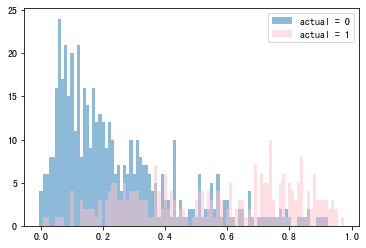

In [39]:
plt.bar(dataframe["opportunity"].values[np.where(dataframe["classify"] == 0)],dataframe["number"].values[np.where(dataframe["classify"] == 0)],width=0.01,alpha = 0.5)
plt.bar(dataframe["opportunity"].values[np.where(dataframe["classify"] == 1)],dataframe["number"].values[np.where(dataframe["classify"] == 1)],width=0.01,alpha = 0.5,color="pink")
plt.legend(["actual = 0","actual = 1"])

In [40]:
y_label = diabetes.iloc[:,-1].values # 非二进制需要pos_label
y_pre = proba
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=1)

In [41]:
matrix = []
for x,y,z in zip(fpr,tpr,thersholds):
    l = []
    for m in proba:
        if m < z:
            l.append(0)
        else:
            l.append(1)
    matrix.append(confusion_matrix(diabetes.iloc[:,-1].values,l))
    p = pd.DataFrame(confusion_matrix(diabetes.iloc[:,-1].values,l),index = ["actual 0","actual 1"],columns=["predict 0","predict 1"])
    print("thersholds:",z)
    print(p)
roc_auc = auc(fpr, tpr)
print("auc",roc_auc)

thersholds: 1.97
          predict 0  predict 1
actual 0        500          0
actual 1        268          0
thersholds: 0.97
          predict 0  predict 1
actual 0        500          0
actual 1        267          1
thersholds: 0.95
          predict 0  predict 1
actual 0        500          0
actual 1        265          3
thersholds: 0.94
          predict 0  predict 1
actual 0        500          0
actual 1        262          6
thersholds: 0.93
          predict 0  predict 1
actual 0        500          0
actual 1        260          8
thersholds: 0.89
          predict 0  predict 1
actual 0        496          4
actual 1        248         20
thersholds: 0.88
          predict 0  predict 1
actual 0        496          4
actual 1        242         26
thersholds: 0.87
          predict 0  predict 1
actual 0        496          4
actual 1        240         28
thersholds: 0.86
          predict 0  predict 1
actual 0        494          6
actual 1        236         32
thersholds

thersholds: 0.09
          predict 0  predict 1
actual 0        110        390
actual 1          5        263
thersholds: 0.08
          predict 0  predict 1
actual 0         89        411
actual 1          5        263
thersholds: 0.07
          predict 0  predict 1
actual 0         72        428
actual 1          4        264
thersholds: 0.06
          predict 0  predict 1
actual 0         48        452
actual 1          3        265
thersholds: 0.05
          predict 0  predict 1
actual 0         32        468
actual 1          2        266
thersholds: 0.03
          predict 0  predict 1
actual 0         16        484
actual 1          2        266
thersholds: 0.01
          predict 0  predict 1
actual 0          4        496
actual 1          0        268
thersholds: 0.0
          predict 0  predict 1
actual 0          0        500
actual 1          0        268
auc 0.8263955223880597


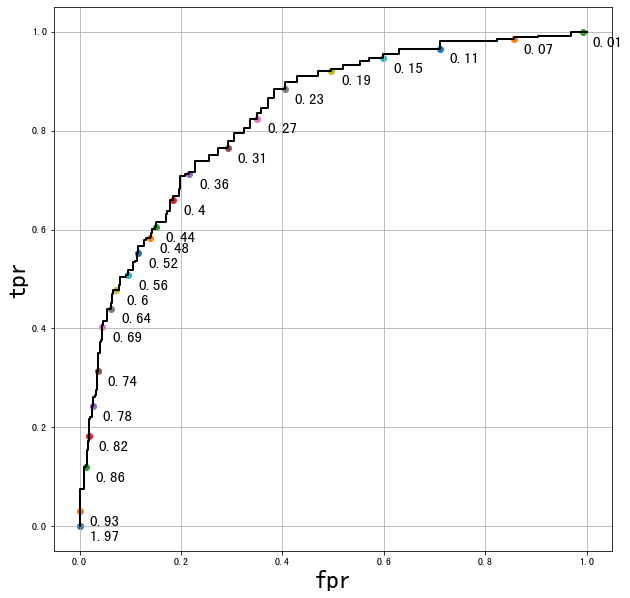

In [42]:
plt.figure(figsize=(10,10))
plt.grid(which = 'both')
plt.step(fpr,tpr, 'k', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.xlabel("fpr",size = 25)
plt.ylabel("tpr",size = 25)
for x in range(0,92,4):
    plt.scatter(fpr[x],tpr[x])
    plt.text(fpr[x]+0.02,tpr[x]-0.03,thersholds[x],size=15)

Text(0, 0.5, '風險成本')

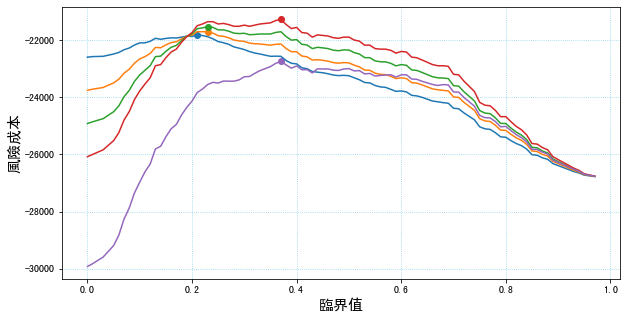

In [43]:
plt.figure(figsize=(10,5))
profit_matrix1 = np.array([[0,-5],[-100,-75]])
profit_matrix2 = np.array([[0,-10],[-100,-70]])
profit_matrix3 = np.array([[0,-15],[-100,-65]])
profit_matrix4 = np.array([[0,-20],[-100,-60]])
profit_matrix5 = np.array([[0,-25],[-100,-65]])
earn = []
plt.grid(color="skyblue",linestyle=":",animated=True)
for y in [profit_matrix1,profit_matrix2,profit_matrix3,profit_matrix4,profit_matrix5]:
    earn1 = []
    for x in matrix:
        earn1.append(np.sum(x * y))
    earn.append(earn1)
earn
for x in range(len(earn)):
    plt.scatter(thersholds[np.where(np.array(earn[x]) == max(earn[x]))[0][0]],max(earn[x]))
    plt.plot(thersholds[1:],earn[x][1:])
plt.xlabel("臨界值",fontsize=15)
plt.ylabel("風險成本",fontsize = 15)
#plt.legend(["藥的成本為5,降低的風險為25","藥的成本為10,降低的風險為30","藥的成本為15,降低的風險為35","藥的成本為20,降低的風險為40","藥的成本為25,降低的風險為35"],fontsize = 15)

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
# 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
# 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
n_components = 4
random_state = 9527

pca = PCA(n_components=n_components, 
          random_state=random_state)
sc = StandardScaler()
x_std = sc.fit_transform(diabetes.iloc[:,:-1])
pca.fit_transform(x_std)

array([[ 1.04875487,  0.62077242,  0.13424818,  0.70048407],
       [-0.62046136, -1.41506563,  0.33741002,  0.47424829],
       [-0.727235  ,  2.48948306, -1.05747274,  0.57666359],
       ...,
       [-0.39901466,  0.23561949,  0.20045807,  0.65354293],
       [-0.90880661, -0.09380077, -1.08617253, -0.6648704 ],
       [-0.11341937, -1.34109435,  0.24874993,  0.27272736]])

In [54]:
pca = PCA(n_components=2)
location = pca.fit_transform(x_std)
location

array([[ 1.04875487,  0.62077242],
       [-0.62046136, -1.41506563],
       [-0.727235  ,  2.48948306],
       ...,
       [-0.39901466,  0.23561949],
       [-0.90880661, -0.09380077],
       [-0.11341937, -1.34109435]])

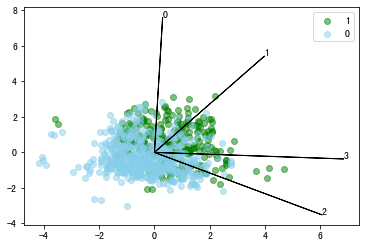

In [81]:
color = ["g","skyblue"]
a = 0
for x in diabetes.iloc[:,-1].unique():
    plt.scatter(location[np.where(diabetes.iloc[:,-1] == x)[0],0],location[np.where(diabetes.iloc[:,-1] == x)[0],1],color = color[a]
               ,alpha = 0.5)
    a+=1
plt.legend([1,0])
for x in range(len(pca.components_.T)):
    plt.arrow(0,0,pca.components_.T[x][0] * 10,pca.components_.T[x][1] * 10)
    plt.text(pca.components_.T[x][0] * 10,pca.components_.T[x][1] * 10,s=x)

In [82]:
pdpca = pd.DataFrame(pca.components_,columns = diabetes.columns[:4])
pdpca.style.background_gradient(cmap='bwr_r', axis=1).format("{:.2}")

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,4. Triceps skin fold thickness (mm),6. Body mass index (weight in kg/(height in m)^2)
0,0.03,0.4,0.61,0.69
1,0.76,0.54,-0.35,-0.037


array([1, 0])

In [8]:
import numpy as np

In [11]:
np.cov(np.array([[1,2,3],[3,4,5]]).T)

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])